In [1]:
from temporal_difference_learning import TemporalDifferenceLearning
import numpy as np

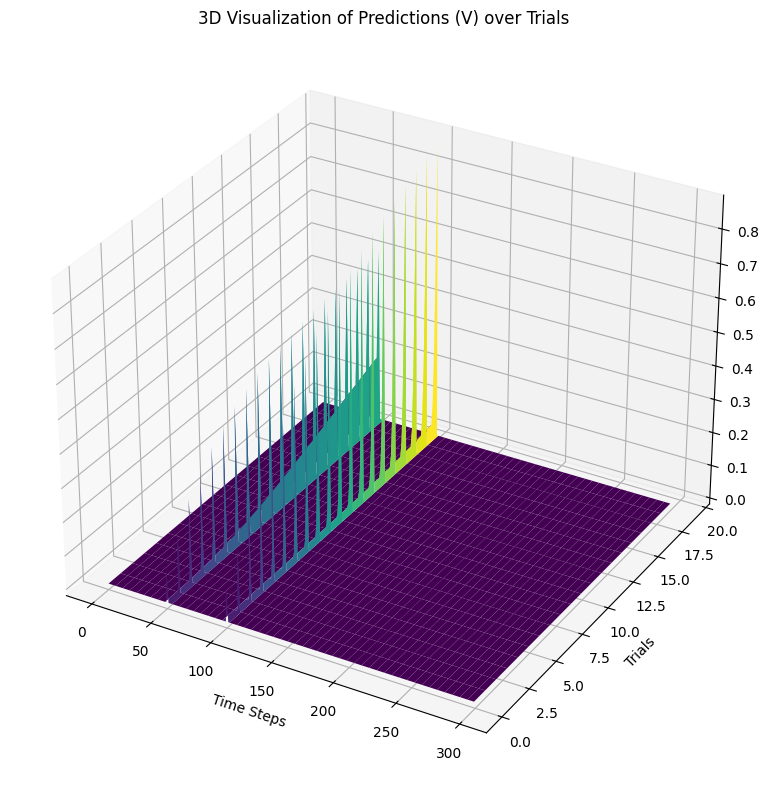

In [2]:
n_time_steps = 300
alpha = 0.1
gamma = 0.9
num_trials = 20
td_model = TemporalDifferenceLearning(n_time_steps, alpha, gamma)

# Stimulus and reward vectors
stimulus_vector = np.zeros(n_time_steps)
reward_vector = np.zeros(n_time_steps)
stimulus_time = 50
reward_time = 100
stimulus_vector[stimulus_time] = 1
reward_vector[reward_time] = 1

# Run multiple trials
td_model.run_trials(reward_vector, stimulus_vector, num_trials)

# Plot the 3D visualization of predictions
td_model.plot_3d_predictions()
